In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [10]:
douglas = Table.read('../data/douglas2017.vot')

possible_singles = (np.array([len(i)==0 for i in douglas['Bin_']]) &  # Not binaries
                    np.array([i == "Y" for i in douglas['Clean_']]) & # Clean periodograms
                    np.array([i == "N" for i in douglas['Bl_']]) )    # Not blends
douglas_singles = douglas[possible_singles]
douglas_smamp = douglas_singles['SmAmp'].data / 100
douglas_smamp_mask = douglas_smamp.data[~douglas_smamp.mask]
douglas_prot = douglas_singles['Prot1'].data.data

In [20]:
amps_ucl = np.load('data/ucl_amps.npy')
pers_ucl = np.load('data/ucl_pers.npy')
amps_psc = np.load('data/psc_amps.npy')
pers_psc = np.load('data/psc_pers.npy')
amps_pra = douglas_smamp_mask[douglas_singles['Mass'] > 0.6]
pers_pra = douglas_prot[douglas_singles['Mass'] > 0.6]
amps_ngc = np.load('data/ngc_amps.npy')
pers_ngc = np.load('data/ngc_pers.npy')
amps_m67 = np.load('data/m67_amps.npy')
pers_m67 = np.load('data/m67_pers.npy')

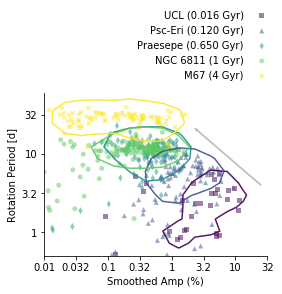

In [26]:
plt.figure(figsize=(4, 3))

s = 25
cmap = lambda x: plt.cm.viridis(x/4)
alpha = 0.5
plt.scatter(np.log10(amps_ucl) + 2, np.log10(pers_ucl), 
            label='UCL (0.016 Gyr)', alpha=alpha, ec='none', color=cmap(0), marker='s', s=s)
plt.scatter(np.log10(amps_psc) + 2, np.log10(pers_psc), 
            label='Psc-Eri (0.120 Gyr)', alpha=alpha, ec='none', color=cmap(1), marker='^', s=s)
plt.scatter(np.log10(amps_pra) + 2, np.log10(pers_pra), 
            label='Praesepe (0.650 Gyr)', alpha=alpha, ec='none', color=cmap(2), marker='d', s=s)
plt.scatter(np.log10(amps_ngc) + 2, np.log10(pers_ngc), label='NGC 6811 (1 Gyr)', 
            alpha=alpha, ec='none', color=cmap(3), s=s)
plt.scatter(np.log10(amps_m67) + 2, np.log10(pers_m67), label='M67 (4 Gyr)', 
            alpha=alpha, ec='none', color=cmap(4), s=s, marker='X')

plt.xlabel('Smoothed Amp (%)')
plt.ylabel('Rotation Period [d]')

plt.arrow(1.4, 0.6, -1, 0.7, width=0.01, color='silver')

from scipy.ndimage import gaussian_filter

def plot_contour(log_smoothed_amps, log_periods, color):
    hist, xedges, yedges = np.histogram2d(log_smoothed_amps, log_periods, normed=True, 
                                              range=[np.log10([0.005, 32]), np.log10([0.3, 60])], bins=15)
    hist = gaussian_filter(hist, 0.8).T
    X, Y = np.meshgrid(0.5 * (xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1]))

    contours = plt.contour(X, Y, hist, levels=[0.45], colors=[color], alpha=0.9)
    
# plt.figure(figsize=(4, 3))
plot_contour(np.log10(amps_ucl) + 2, np.log10(pers_ucl), cmap(0))
plot_contour(np.log10(amps_psc) + 2, np.log10(pers_psc), cmap(1))
plot_contour(np.log10(amps_pra) + 2, np.log10(pers_pra), cmap(2))    
plot_contour(np.log10(amps_ngc) + 2, np.log10(pers_ngc), cmap(3))
plot_contour(np.log10(amps_m67) + 2, np.log10(pers_m67), cmap(4))

ax = plt.gca()
ax.set_xlim(np.log10([0.01, 12]))
xticks = np.array(ax.get_xticks())
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:.2g}".format(i) for i in 10**xticks])# , rotation=30, ha='right')

ax.set_ylim(np.log10([0.5, 60]))
yticks = np.array(ax.get_yticks())
ax.set_yticklabels(["{0:.2g}".format(i) for i in 10**yticks])
leg = plt.legend(loc=(0.4, 1.05), framealpha=0.8, frameon=False)#(0, 1.01))

# plt.annotate("Uniform", np.log10([0.012, 0.58]), fontsize=8)
# plt.annotate("Asymmetric", np.log10([7, 0.58]), fontsize=8)

# http://matplotlib.1069221.n5.nabble.com/Right-align-legend-contents-td13119.html
vp = leg._legend_box._children[-1]._children[0] 
for c in vp._children: 
    c._children.reverse() 
vp.align = "right" 

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
plt.savefig('plots/clusters.pdf', bbox_inches='tight')

[-0.52076081 -0.41112887] [0.31118183 0.24919109]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


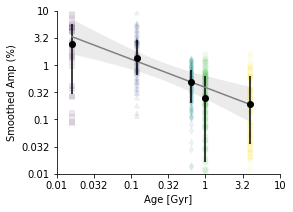

In [28]:
import seaborn
import scipy.special as sp

x = []
y = []
yerr = []

def plot_age(age_gyr, log_smoothed_amp, color, marker):

    plt.scatter(np.log10(age_gyr) * np.ones_like(log_smoothed_amp), log_smoothed_amp, 
                color=color, marker=marker, alpha=0.1, ec='none')
    
    lo, med, hi = np.nanpercentile(log_smoothed_amp, [16, 50, 84])
    yerrs = [[med-lo], [hi-med]]
    
    plt.errorbar(np.log10(age_gyr), np.nanmedian(log_smoothed_amp), yerrs,
                 color='k', fmt='o', ecolor='black')

    x.append(np.log10(age_gyr))
    y.append(np.nanmedian(log_smoothed_amp))
    yerr.append(np.mean(yerrs))

plt.figure(figsize=(4, 3))
plot_age(0.016, np.log10(amps_ucl) + 2, cmap(0), 's')
plot_age(0.12, np.log10(amps_psc) + 2, cmap(1), '^')
plot_age(0.65, np.log10(amps_pra) + 2, cmap(2), 'd')
plot_age(1.0, np.log10(amps_ngc) + 2, cmap(3), 'o')
plot_age(4.0, np.log10(amps_m67) + 2, cmap(4), 'X')
    
x = np.array(x)
y = np.array(y)
yerr = np.array(yerr)

X = np.vander(x, 2)
Omega_0 = np.diag(yerr**2)
inv_Omega_0 = np.linalg.inv(Omega_0)
c0 = np.linalg.inv(X.T @ inv_Omega_0 @ X) @ X.T @ inv_Omega_0 @ y
c0err = np.diag(np.linalg.inv(X.T @ inv_Omega_0 @ X))**0.5
print(c0, c0err)

plt.plot(x, X @ c0, color='gray')

# https://stackoverflow.com/questions/25994048/confidence-regions-of-1sigma-for-a-2d-plot
## These multipliers are used in constructing the intervals.
## Get the coefficient estimates.
X_fine = np.vander(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 2)
Yhat = X_fine @ c0
n = len(X_fine)#len(meds)
Y = y.copy()
U, s, vt = np.linalg.svd(X_fine, False)

s = 2 * np.mean(yerr) 

## These multipliers are used in constructing the intervals.
XtX = np.dot(np.transpose(X_fine), X_fine)
V = [np.dot(X_fine[i,:], np.linalg.solve(XtX, X_fine[i,:])) for i in range(n)]
V = np.array(V)

## The F quantile used in constructing the Scheffe interval.
QF = sp.fdtri(X.shape[1], n-X.shape[1], 0.95)
QF_2 = sp.fdtri(X.shape[1], n-X.shape[1], 0.68)

## The lower and upper bounds of the Scheffe band.
D = s * np.sqrt(X.shape[1] * QF * V)
# LB, UB = Yhat-D, Yhat+D
D_2 = s*np.sqrt(X.shape[1] * QF_2 * V)
LB_2, UB_2 = Yhat-D_2, Yhat+D_2

plt.plot(np.log10(x), X @ c0, color='gray')
plt.fill_between(X_fine[:, 0], LB_2, UB_2, where=(UB_2 >= LB_2), facecolor='silver', alpha=0.3)
ax = plt.gca()

ax = plt.gca()
ax.set_xlim(np.log10([0.01, 5]))
xticks = np.array(ax.get_xticks())
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:.2g}".format(i) for i in 10**xticks])# , rotation=30, ha='right')

ax.set_ylim(np.log10([0.01, 10]))
yticks = np.array(ax.get_yticks())
ax.set_yticklabels(["{0:.2g}".format(i) for i in 10**yticks])

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)

ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Smoothed Amp (%)')

plt.savefig('plots/age_smamp.pdf', bbox_inches='tight')